<center><h2>Stock Price Prediction KNN Algorithm</h2></center>

In [1]:
import pandas as pd         # For working with tabular data
import numpy as np          # For numerical operations
import matplotlib.pyplot as plt  # For creating charts and plots
import yfinance as yf       # Import yfinance to fetch stock data from Yahoo Finance

In [4]:
# Download data for Tata Consumer from 2015 to 2025 (NSE -> National Stock Exchange)
data = yf.download("TATACONSUM.NS", start="2015-01-01", end="2025-01-01")

data.columns = data.columns.to_flat_index()  # Flatten multi-level columns into single-level tuples

print(data.head())  # Display first few rows

[*********************100%***********************]  1 of 1 completed

            (Close, TATACONSUM.NS)  (High, TATACONSUM.NS)  \
Date                                                        
2015-01-01              132.653610             133.577875   
2015-01-02              134.238083             134.854255   
2015-01-05              134.634155             135.998545   
2015-01-06              130.408997             133.753948   
2015-01-07              130.673035             131.333222   

            (Low, TATACONSUM.NS)  (Open, TATACONSUM.NS)  \
Date                                                      
2015-01-01            132.345531             132.873673   
2015-01-02            132.521599             132.829678   
2015-01-05            133.489828             133.489828   
2015-01-06            129.396715             133.753948   
2015-01-07            128.516426             129.572723   

            (Volume, TATACONSUM.NS)  
Date                                 
2015-01-01                   535692  
2015-01-02                  2043127  
2015-0

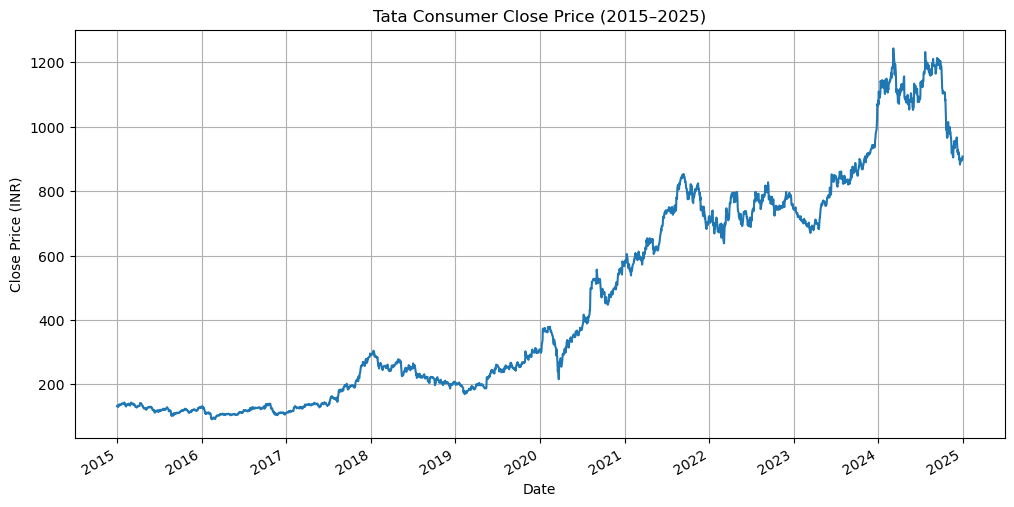

In [6]:
data[('Close', 'TATACONSUM.NS')].plot(figsize=(12,6))  # Plot 'Close' price using tuple column name
plt.title("Tata Consumer Close Price (2015–2025)")  # Set chart title
plt.xlabel("Date")                         # X-axis label
plt.ylabel("Close Price (INR)")            # Y-axis label
plt.grid(True)                             # Show grid for better readability
plt.show()                                 # Display the plot

In [8]:
# Calculate daily price movement: difference between opening and closing prices
data["Open-Close"] = data[('Open', 'TATACONSUM.NS')] - data[('Close', 'TATACONSUM.NS')]

# Calculate daily volatility range: difference between high and low prices
data["High-Low"] = data[('High', 'TATACONSUM.NS')] - data[('Low', 'TATACONSUM.NS')]

# Drop rows with any missing values
data = data.dropna()

In [9]:
X = data[["Open-Close", "High-Low"]]  # Select features for analysis or model input
X.head()                              # Display the first 5 rows of the selected data

,Open-Close,High-Low
Date,,
2015-01-01,0.220062,1.232344
2015-01-02,-1.408405,2.332656
2015-01-05,-1.144327,2.508716
2015-01-06,3.344952,4.357234
2015-01-07,-1.100312,2.816796


<center><h3>Classification Problem: Label Buy as +1, Sell as -1</h3>

In [12]:
# shift(-1) moves the 'Close' prices up by one row to compare next day's price with today's
# If next day's Close is higher than today's, label 1 (Buy), else -1 (Sell)
Y = np.where(data[('Close', 'TATACONSUM.NS')].shift(-1) > data[('Close', 'TATACONSUM.NS')], 1, -1)  
Y

array([ 1,  1, -1, ..., -1,  1, -1])

In [13]:
from sklearn.model_selection import train_test_split  # Import function to split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)  
# Split data into training (75%) and testing (25%) sets for model building and evaluation

<center><h3>Implementing KNN Classifier</h3>

In [17]:
from sklearn.neighbors import KNeighborsClassifier  # KNN algorithm
from sklearn import neighbors                      # Alternative way to import for KNN
from sklearn.model_selection import GridSearchCV  # To find best hyperparameters(K) automatically
from sklearn.metrics import accuracy_score        # To measure model accuracy

params = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15]}  # Try these K values for neighbors
knn = neighbors.KNeighborsClassifier()                       # Create KNN model
model = GridSearchCV(knn, params, cv=5)                      # Grid search with 5-fold cross-validation to find best K

model.fit(X_train, y_train)                                   # Train model on training data

accuracy_train = accuracy_score(y_train, model.predict(X_train))  # Accuracy on training data
accuracy_test = accuracy_score(y_test, model.predict(X_test))     # Accuracy on testing data

print('Train_data Accuracy: %.2f' % accuracy_train)           # Print training accuracy
print('Test_data Accuracy: %.2f' % accuracy_test)             # Print testing accuracy

Train_data Accuracy: 0.69
Test_data Accuracy: 0.48


In [20]:
# Make predictions using the trained KNN model on the test data
predictions_classification = model.predict(X_test)

# Create a DataFrame to compare actual vs predicted values side-by-side
actual_predicted_data = pd.DataFrame({
    'Actual Class': y_test,               # True values from the test set
    'Predicted Class': predictions_classification  # Values predicted by the model
})
actual_predicted_data 

,Actual Class,Predicted Class
0,1,-1
1,1,-1
2,1,-1
3,-1,-1
4,-1,-1
...,...,...
612,1,-1
613,1,1
614,1,-1
615,-1,-1


<center><h3>Implementing KNN Regression</h3>

In [23]:
y = data[("Close", "TATACONSUM.NS")]  # Access the 'Close' column safely from multi-level columns
y

Date
2015-01-01    132.653610
2015-01-02    134.238083
2015-01-05    134.634155
2015-01-06    130.408997
2015-01-07    130.673035
                 ...    
2024-12-24    900.625061
2024-12-26    894.321838
2024-12-27    901.270325
2024-12-30    896.853027
2024-12-31    907.970642
Name: (Close, TATACONSUM.NS), Length: 2467, dtype: float64

In [24]:
from sklearn.neighbors import KNeighborsRegressor         # Import KNN Regressor
from sklearn import neighbors                             # Alternative way to access KNN classes
from sklearn.model_selection import train_test_split      # For splitting data into train and test sets

# Split the dataset into training and testing sets (75% train, 25% test)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y, test_size=0.25)

# Define a dictionary with values of 'n_neighbors' to try (for hyperparameter tuning)
params = {'n_neighbors': [2,3,4,5,6,7,8,9,10,11,12,13,14,15]}

# Create KNN regressor model
knn_reg = neighbors.KNeighborsRegressor()

# Use GridSearchCV to find the best value of 'n_neighbors' using 5-fold cross-validation
model_reg = GridSearchCV(knn_reg, params, cv=5)

# Train the model on the training data
model_reg.fit(X_train_reg, y_train_reg)

# Predict target values on the test set
predictions = model_reg.predict(X_test_reg)

# Print predicted values
print(predictions)

[ 117.81889445  870.97704264  601.37666829  467.38786621  588.16821493
  546.69266256  211.25493724  171.8258906   214.53508809  664.92027893
  311.07348684  673.37782288  857.67365723  193.98285675  753.71605632
  370.37972209  907.60568034  975.12786051  736.9051473   167.58407186
  256.68400269  124.05411682  670.42607524  405.10842183  152.40798645
  540.81004944  468.07225545  528.61011047  213.34847717  134.06106669
  205.8008255   154.40095164  134.06106669  678.75616252  758.2598643
  418.27003072  736.71038411  727.65591939  641.81138611  668.31236165
  156.80195669  726.29713949  122.48351288  315.92307841  559.56786092
  894.29381714  668.75535177  433.95774028  150.42253723  140.54177806
  813.50815837  625.30536092  124.51972707  195.96032511  941.44166463
  128.47021586  891.89981283  124.9243398   327.6793513   793.65673421
  157.27235718  212.50236715  281.16988983  429.92357483  542.34592183
  725.37059428  442.57613932  692.32537028  924.37277018  211.67108765
  182.4

In [25]:
# Root Mean Square Error calculation
squared_errors = (y_test_reg - predictions) ** 2        # Square of errors
mean_squared_error = squared_errors.mean()              # Mean of squared errors
rmse = np.sqrt(mean_squared_error)                      # Square root of MSE
print("Root Mean Squared Error (Manual):", rmse)

Root Mean Squared Error (Manual): 195.33872460916928


In [28]:
# Create a DataFrame with actual and predicted close prices
results_df = pd.DataFrame({
    'Actual Close': y_test_reg,
    'Predicted Close': predictions
})
results_df.head()

,Actual Close,Predicted Close
Date,,
2017-04-25,137.912521,117.818894
2024-08-19,1168.738037,870.977043
2020-02-06,374.447571,601.376668
2023-02-10,708.614563,467.387866
2022-11-23,751.086670,588.168215
